Data 620
Assignment 2
Antonio J. Bayquen 


This week's assignment is to:

    1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.
    2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.
    3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
    4. Record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission.



In [10]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


from scipy.io import mmread

In [12]:
import numpy
import pandas as pd

For this assignment, I have chosen to do a Centrality Analysis of the Network of Major Roads in Chesapeake, VA. a city with a 
population of 242,634 (2019 estimate)

![](Chesapeake.jpg)

<img scr='Chesapeake.jpg'/>

<image scr="Chesapeake.jpg"/>

In [4]:
B = mmread('road-chesapeake.mtx')

There are 39 nodes identified in the graph; these represent the 39 major roads that comprise the road system in the city limits

In [13]:
numpy.shape(B)

(39, 39)

Since we loaded a sparse matrix, we need to convert our matrix to an appropriate Grahph (G) format using networkx and numpy

In [6]:
type(B)

scipy.sparse.coo.coo_matrix

In [7]:
from numpy import array

In [8]:
G=nx.from_scipy_sparse_matrix(B, parallel_edges=False, create_using=None, edge_attribute='weight')

Using matplotlib, I generated a labelled network graph of the road system in Chesapeake, VA. Noticed from the graph how few of the nodes (about 7 to 8 of the 39 total) are centrally located (nodes 21, 38, 35, 37, 22 for example) so as to influence the most neighbors. Some nodes are in the pheripery only have edge counts of only 3 (33, etc.) and 4 (3,36,etc.). 
About a third of the noed shows lower degree of eccentricity. That is, for this nodes (and they are nodes at the center of the graph), it is much easier to travel from that node to the periphery of the graph. On the other hand, for nodes in the periphery, it takes longer to traverse (have to go through more noedes) to get from the node to the other end of the graph.

This finding is in line with what we know about how roads are constructed in any city. We have the major thoroughfare that are long and wide and crosses the entire lenght of the city. Examples of this are interstate highways and major state roads. Because of their lenght, they intersect a lot of the local roads thus giving it a high degree of centrality. On, the other hand, county roads, city roads, community roads are much shorter and as such they have less degree of centrality since fewer roads intersect with them. Local road 33, for example, only has 2 intersecting roads - meaning their are only 2 ways you can get in and out of this small local road.


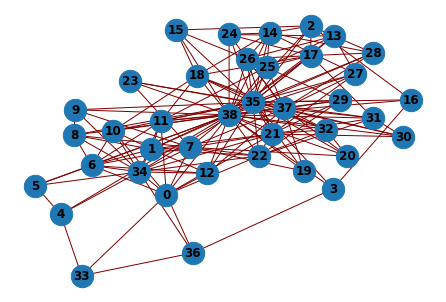

In [26]:
nx.draw(G,with_labels=True,node_size=500,edge_color="maroon",font_weight='bold')
plt.show()

## Metrics and Analysis

Minimum Eccentricity of the graph (Raidus)


In [29]:
nx.radius(G)


2

Maximum Eccentricity of the graph (Diameter)

In [30]:
nx.diameter(G)

3

Total Number of Nodes (Representing the total number of major roads in the City of Chesapeake (VA))

In [31]:
G.number_of_nodes()

39

In [32]:
G.number_of_edges()

170

In [ ]:
G.edges()

About 1/4 of the roads in Chesapeake have an eccentricity of 2 and about 3/4 of the roads have any eccentricity fo 3. This means, that you can get from any road A to any road B by crossing between 2 to 3 roads - which make navigating Chesapeake roads easy. 

Text(0, 0.5, 'Frequency')

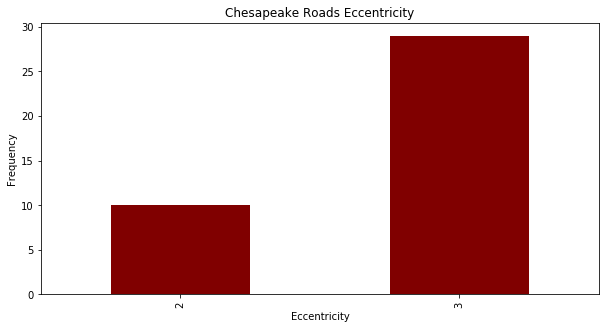

In [34]:
G_ecc = pd.DataFrame((nx.eccentricity(G).values()))[0].value_counts().sort_index()

plot = G_ecc.plot(kind='bar',
                        color = "maroon",
                        figsize=(10,5),
                        title="Chesapeake Roads Eccentricity")
plot.set_xlabel("Eccentricity")
plot.set_ylabel("Frequency")

### Centrality

#### Degree of Centrality
#### Number of Ties to a Node

In [35]:
deg=G.degree()

In [36]:
deg

DegreeView({0: 11, 1: 11, 2: 7, 3: 4, 4: 4, 5: 4, 6: 10, 7: 13, 8: 7, 9: 5, 10: 7, 11: 9, 12: 7, 13: 8, 14: 9, 15: 5, 16: 4, 17: 9, 18: 9, 19: 4, 20: 5, 21: 13, 22: 10, 23: 4, 24: 6, 25: 7, 26: 9, 27: 6, 28: 6, 29: 6, 30: 5, 31: 7, 32: 7, 33: 3, 34: 15, 35: 29, 36: 4, 37: 18, 38: 33})

In [37]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)

In [38]:
dmax

33

In [39]:
dmin

3

In [40]:
sorted_g = sorted([(value, key) for (key,value) in G.degree()], reverse=True)

In [41]:
sorted_g[0:9]

[(33, 38),
 (29, 35),
 (18, 37),
 (15, 34),
 (13, 21),
 (13, 7),
 (11, 1),
 (11, 0),
 (10, 22)]

The degree o centrality measure for the Chesapeake City roads show a 'bimodal' histogram showing that most roads either have 
less than 10 intersections or on the other extreme, more than 30 intersections (true for interstate and state roads).

Text(0.5, 1.0, 'Distribution of Degrees in Chesapeak City Network of Roads')

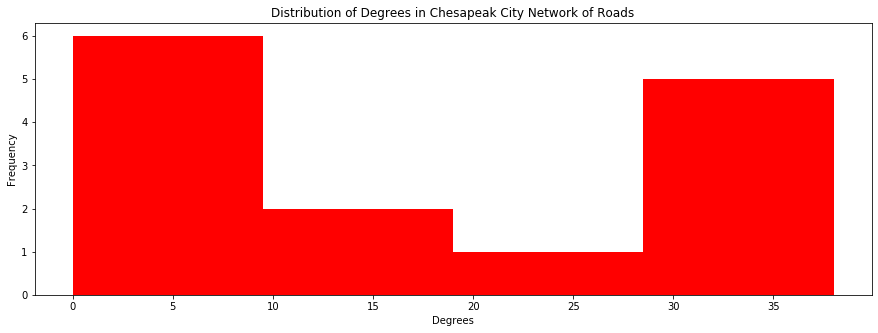

In [51]:
plt.figure(figsize=(15,5))
plt.hist(dict(sorted_g).values(), 4, color = "red")
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Distribution of Degrees in Chesapeak City Network of Roads')

#### Closeness of Centrality

#### Reciprocal of the sum of the length of the shortest paths between the node and all other nodes 

In [50]:
c = nx.closeness_centrality(G)
c

{0: 0.5846153846153846,
 1: 0.5757575757575758,
 2: 0.5277777777777778,
 3: 0.5205479452054794,
 4: 0.5205479452054794,
 5: 0.5205479452054794,
 6: 0.5757575757575758,
 7: 0.6031746031746031,
 8: 0.5428571428571428,
 9: 0.5277777777777778,
 10: 0.5507246376811594,
 11: 0.5671641791044776,
 12: 0.5507246376811594,
 13: 0.5428571428571428,
 14: 0.5507246376811594,
 15: 0.5205479452054794,
 16: 0.5135135135135135,
 17: 0.5507246376811594,
 18: 0.5507246376811594,
 19: 0.5135135135135135,
 20: 0.5205479452054794,
 21: 0.6031746031746031,
 22: 0.5757575757575758,
 23: 0.5135135135135135,
 24: 0.5277777777777778,
 25: 0.5352112676056338,
 26: 0.5507246376811594,
 27: 0.5277777777777778,
 28: 0.5277777777777778,
 29: 0.5277777777777778,
 30: 0.5205479452054794,
 31: 0.5352112676056338,
 32: 0.5352112676056338,
 33: 0.3917525773195876,
 34: 0.6229508196721312,
 35: 0.7916666666666666,
 36: 0.4175824175824176,
 37: 0.5846153846153846,
 38: 0.8837209302325582}

In [52]:
min(c.values())

0.3917525773195876

In [53]:
max(c.values())

0.8837209302325582

In [54]:
sorted_c = sorted([(value, key) for (key,value) in c.items()],reverse=True)


In [55]:
sorted_c[0:9]

[(0.8837209302325582, 38),
 (0.7916666666666666, 35),
 (0.6229508196721312, 34),
 (0.6031746031746031, 21),
 (0.6031746031746031, 7),
 (0.5846153846153846, 37),
 (0.5846153846153846, 0),
 (0.5757575757575758, 22),
 (0.5757575757575758, 6)]

Only a small number of roads exhibit a high closeness centrality scores. These again are the interstates and state roads that are 'close' to all other roads in the network. Most roads, such as county, city, community roads have less than average closeness centrality when compared to the interstate roads. 
This makes sense as most local roads are confined to a small portion of the city and some may not even be a few blocks long. This makes 'intersecting' with another local road that may be on the other side of town or may just happen to run parallel to the road 'non intersecting'.

Text(0.5, 1.0, 'Distribution of Closeness Metric in City of Chesapeake Network of Roads')

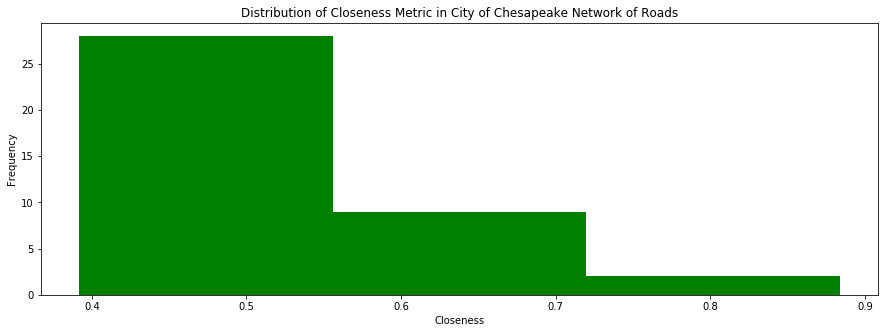

In [60]:
plt.figure(figsize=(15,5))
plt.hist(dict(c).values(), 3, color = "green")
plt.xlabel('Closeness')
plt.ylabel('Frequency')
plt.title('Distribution of Closeness Metric in City of Chesapeake Network of Roads')

#### Betweeness Centrality 

#### Nodes that serve as a bridge between one part of the graph and another 

In [61]:
b = nx.betweenness_centrality(G)
b

{0: 0.050475200475200474,
 1: 0.005608529292739819,
 2: 0.0034308744835060624,
 3: 0.01339045812730023,
 4: 0.014187408924251025,
 5: 0.000583579530947952,
 6: 0.006683722473196156,
 7: 0.026075556281505936,
 8: 0.0011954696165222482,
 9: 0.00031827663406610776,
 10: 0.0035583588215167164,
 11: 0.009914038726799529,
 12: 0.0036314403389379833,
 13: 0.004141735720683088,
 14: 0.005851340061866378,
 15: 0.0008621403358245464,
 16: 0.0008094560726139675,
 17: 0.006230666756982547,
 18: 0.009042345120552147,
 19: 0.0007033670447319661,
 20: 0.0009878620660690924,
 21: 0.024242132002261222,
 22: 0.010918281836305797,
 23: 0.0007033670447319661,
 24: 0.0019418235463463625,
 25: 0.0031272194685843893,
 26: 0.007041660225130409,
 27: 0.0020086196657740606,
 28: 0.0019418235463463625,
 29: 0.0010431805424402005,
 30: 0.000545314255100229,
 31: 0.0026105373729549256,
 32: 0.0023234081384572703,
 33: 0.0011853959222380274,
 34: 0.04850100559482711,
 35: 0.20490490490490493,
 36: 0.004668202036623

In [62]:
sorted_b = sorted([(value, key) for (key,value) in b.items()],reverse=True)

In [63]:
min(b.values())

0.00031827663406610776

In [64]:
max(b.values())

0.3408661232459859

In [65]:
sorted_b[0:9]

[(0.3408661232459859, 38),
 (0.20490490490490493, 35),
 (0.05425726478358057, 37),
 (0.050475200475200474, 0),
 (0.04850100559482711, 34),
 (0.026075556281505936, 7),
 (0.024242132002261222, 21),
 (0.014187408924251025, 4),
 (0.01339045812730023, 3)]

Other than the interstate and state roads that encirlces the entire city, local roads as we see in the graph below have small betweenness centrality score. 
And indeed, we know that to get from one point to another, the shortest way is to hop on the interstate and exit at the local road where are destination is. If we would have taken local roads, it probably would have us driving to 5 to 6 local roads before reaching our destination. Thus local roads don't provide that 'quick' link between one part of town with the other part of town.

Text(0.5, 1.0, 'Distribution of Betweenness Metric in City of Chesapeake Network of Roads')

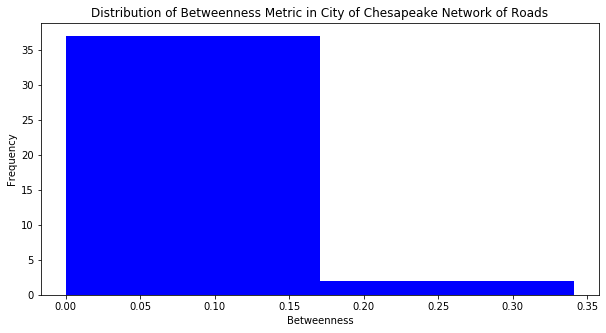

In [67]:
plt.figure(figsize=(10,5))
plt.hist(dict(b).values(), 2, color = "blue")
plt.xlabel('Betweenness')
plt.ylabel('Frequency')
plt.title('Distribution of Betweenness Metric in City of Chesapeake Network of Roads')

#### Eigenvector Centrality

#### has the highesh degree of influence on nodes that have a high degree of centrality

In [72]:
e = nx.eigenvector_centrality(G)
e

{0: 0.1633142941719281,
 1: 0.20002557867157078,
 2: 0.1159665397492757,
 3: 0.07401472886364473,
 4: 0.059373489196212256,
 5: 0.07022352450623401,
 6: 0.15847043012778342,
 7: 0.20076771090174994,
 8: 0.13964847155714408,
 9: 0.11095926296113176,
 10: 0.1403666751519149,
 11: 0.17165715269597087,
 12: 0.14631041145198506,
 13: 0.13102195104250777,
 14: 0.14465032450703685,
 15: 0.10110602260599018,
 16: 0.08005802217565366,
 17: 0.1459443472902864,
 18: 0.1566690446526164,
 19: 0.10056829765361026,
 20: 0.11291771534183104,
 21: 0.22094959112652507,
 22: 0.18613518494319473,
 23: 0.10056829765361026,
 24: 0.11977947871583992,
 25: 0.1347116485305121,
 26: 0.1593094619737759,
 27: 0.12630406759711793,
 28: 0.11977947871583992,
 29: 0.13237356881478896,
 30: 0.1146049570138442,
 31: 0.1411802065631186,
 32: 0.14196642863959621,
 33: 0.02288993514682147,
 34: 0.20480242534727228,
 35: 0.3457219573608652,
 36: 0.040451235238103914,
 37: 0.2250000830021762,
 38: 0.3846358242084885}

In [69]:
sorted_d = sorted([(value, key) for (key,value) in b.items()],reverse=True)

In [70]:
sorted_d[0:9]

[(0.3408661232459859, 38),
 (0.20490490490490493, 35),
 (0.05425726478358057, 37),
 (0.050475200475200474, 0),
 (0.04850100559482711, 34),
 (0.026075556281505936, 7),
 (0.024242132002261222, 21),
 (0.014187408924251025, 4),
 (0.01339045812730023, 3)]

Text(0.5, 1.0, 'Distribution of Eigenvalue Centrality Metric in City of Chesapeake Network of Roads')

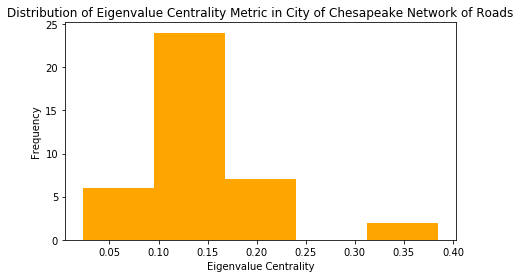

In [71]:
plt.figure(figsize=(7,4))
plt.hist(dict(e).values(), 5, color = "orange")
plt.xlabel('Eigenvalue Centrality')
plt.ylabel('Frequency')
plt.title('Distribution of Eigenvalue Centrality Metric in City of Chesapeake Network of Roads')